In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.preprocess import preprocess
from util.geo_data import add_geo_data

In [2]:
import os

# Create folder (only once)
save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)

In [3]:
sns.set_theme(style="whitegrid", palette="pastel")

# Dataset Overview

In [ ]:
df_dirty = pd.read_csv('../data/train.csv')
df = preprocess(df_dirty)
df = add_geo_data(df)
# df = pd.read_csv('../data/train_preprocessed.csv')
df.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET,FLOOR_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATA,RESALE_PRICE,RESALE_YEAR,RESALE_MONTH,FLAT_AGE,FLOOR_AVG,LATITUDE,LONGITUDE,DIST_TO_NEAREST_MRT_M,DIST_TO_NEAREST_HAWKER_M,DIST_TO_NEAREST_SHOP_M
0,2020-10,woodlands,4 room,681B,woodlands drive 62,07 to 09,102.0,premium apartment,2000,420000.0,2020,10,20,8,1.439325,103.803324,306.013744,2683.955240,1994.701707
1,2021-07,bishan,4 room,264,bishan street 24,07 to 09,104.0,model a,1992,585000.0,2021,7,29,8,1.358659,103.842050,786.297948,916.936357,1176.138670
2,2021-05,bukit panjang,4 room,520,jelapang road,19 to 21,102.0,model a,1998,450000.0,2021,5,23,20,1.386468,103.766508,1052.540106,5364.143377,980.543397
3,2021-08,punggol,4 room,121B,edgedale plains,16 to 18,93.0,model a,2017,465000.0,2021,8,4,17,1.393089,103.909042,872.296018,4563.650903,463.143097
4,2023-05,hougang,5 room,997B,buangkok crescent,10 to 12,113.0,improved,2018,710000.0,2023,5,5,11,1.385902,103.881387,1342.862156,2921.355463,851.672489


In [5]:
df.shape

(162691, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MONTH                     162691 non-null  object 
 1   TOWN                      162691 non-null  object 
 2   FLAT_TYPE                 162691 non-null  object 
 3   BLOCK                     162691 non-null  object 
 4   STREET                    162691 non-null  object 
 5   FLOOR_RANGE               162691 non-null  object 
 6   FLOOR_AREA_SQM            162691 non-null  float64
 7   FLAT_MODEL                162691 non-null  object 
 8   LEASE_COMMENCE_DATA       162691 non-null  int64  
 9   RESALE_PRICE              162691 non-null  float64
 10  RESALE_YEAR               162691 non-null  int64  
 11  RESALE_MONTH              162691 non-null  int64  
 12  FLAT_AGE                  162691 non-null  int64  
 13  FLOOR_AVG                 162691 non-null  i

In [7]:
df.describe()

,FLOOR_AREA_SQM,LEASE_COMMENCE_DATA,RESALE_PRICE,RESALE_YEAR,RESALE_MONTH,FLAT_AGE,FLOOR_AVG,LATITUDE,LONGITUDE,DIST_TO_NEAREST_MRT_M,DIST_TO_NEAREST_HAWKER_M,DIST_TO_NEAREST_SHOP_M
count,162691.000000,162691.000000,1.626910e+05,162691.000000,162691.000000,162691.000000,162691.000000,162691.000000,162691.000000,162691.000000,162691.000000,162691.000000
mean,96.891250,1996.358993,5.188430e+05,2021.050949,6.474439,24.691956,8.767043,1.368214,103.841165,664.664552,1920.181564,989.764624
std,24.030547,14.245920,1.832442e+05,2.439251,3.378455,14.137947,5.932431,0.042936,0.071025,374.113497,1684.991043,589.850730
min,31.000000,1966.000000,1.500000e+05,2017.000000,1.000000,1.000000,2.000000,1.270380,103.685228,21.845343,0.000000,2.448408
25%,82.000000,1985.000000,3.820000e+05,2019.000000,4.000000,10.000000,5.000000,1.337481,103.779388,405.522051,440.512954,552.472152
50%,93.000000,1996.000000,4.880000e+05,2021.000000,7.000000,25.000000,8.000000,1.367695,103.846208,600.716175,1433.761412,850.331316
75%,112.000000,2011.000000,6.220000e+05,2023.000000,9.000000,36.000000,11.000000,1.396867,103.898716,838.963987,3009.969593,1302.269254
max,366.700000,2022.000000,1.658888e+06,2025.000000,12.000000,59.000000,50.000000,1.457071,103.987805,2571.683298,6737.925491,3202.446220


## Features

In [8]:
str = ""
for col in df.columns:
    str += col.lower().replace('_', ' ') + ', '

print(str)

month, town, flat type, block, street, floor range, floor area sqm, flat model, lease commence data, resale price, resale year, resale month, flat age, floor avg, latitude, longitude, dist to nearest mrt m, dist to nearest hawker m, dist to nearest shop m, 


## Town

In [9]:
df['TOWN'].value_counts()
df['TOWN'].value_counts().shape

(26,)

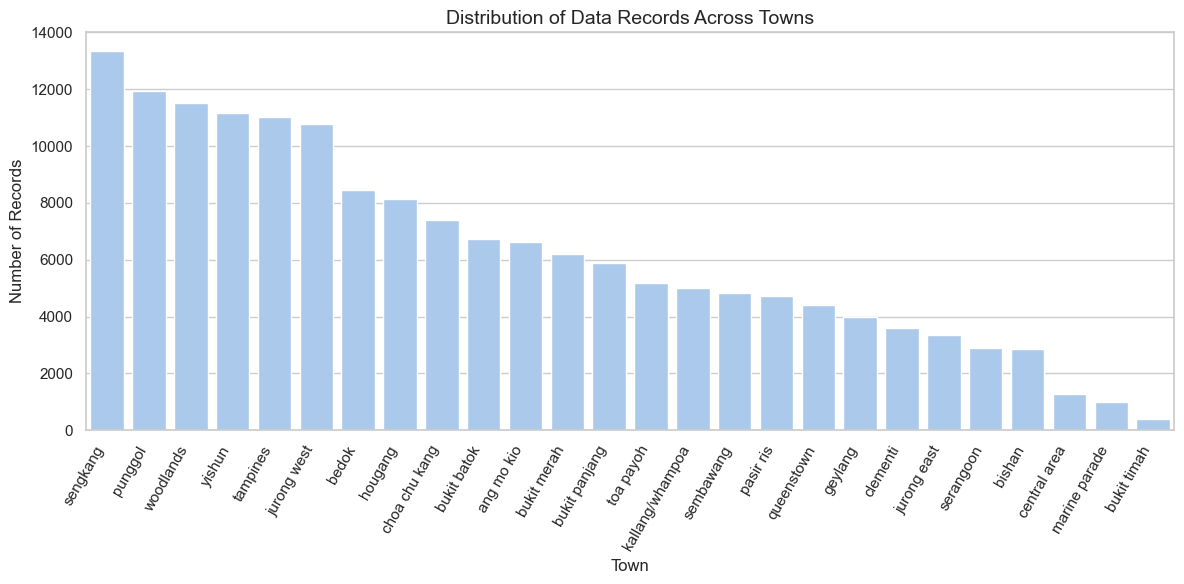

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='TOWN',
    order=df['TOWN'].value_counts().index
)

plt.title('Distribution of Data Records Across Towns', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.savefig('plots/distribution_town_records.png', bbox_inches='tight', dpi=300)
plt.show()


# Target Variable

In [11]:
# sns.set_theme(style="whitegrid", palette="pastel")

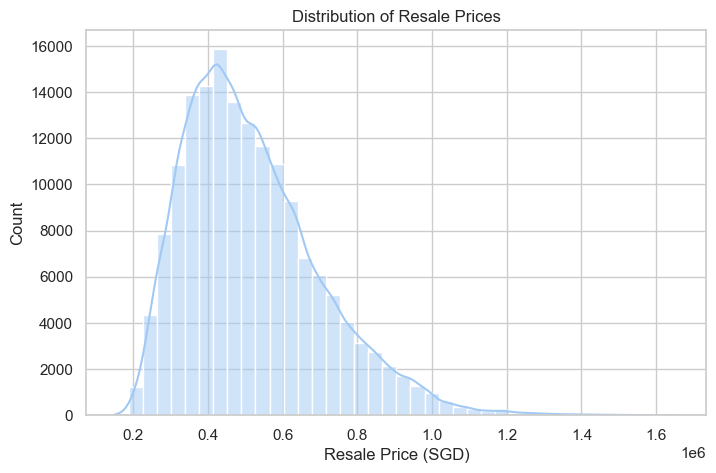

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['RESALE_PRICE'], kde=True, bins=40)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Count')
plt.savefig('plots/resale_price_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

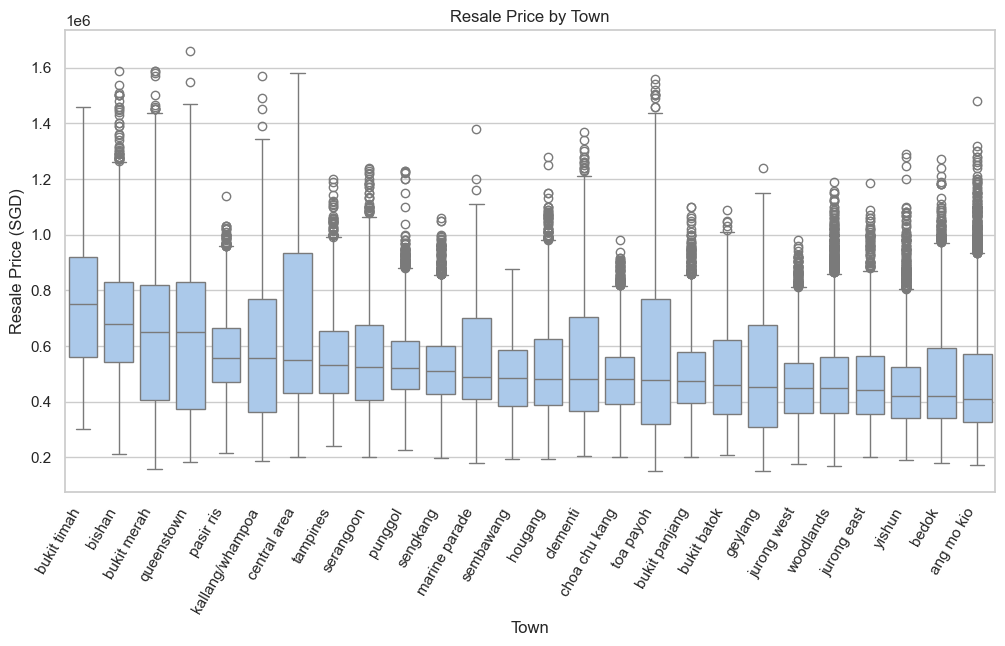

In [13]:
plt.figure(figsize=(12,6))
# Sort towns by median price
order = df.groupby('TOWN')['RESALE_PRICE'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='TOWN', y='RESALE_PRICE', order=order)
plt.xticks(rotation=60, ha='right')
plt.title('Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_town_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

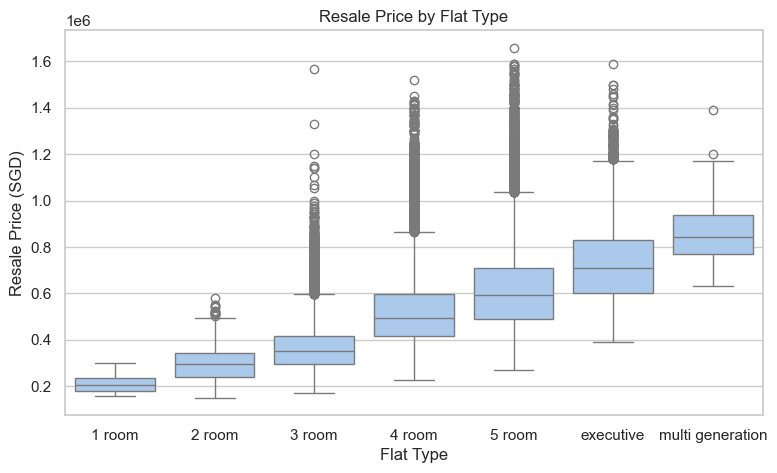

In [14]:
plt.figure(figsize=(9,5))
order = sorted(df['FLAT_TYPE'].unique())
sns.boxplot(data=df, x='FLAT_TYPE', y='RESALE_PRICE', order=order)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_type_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()


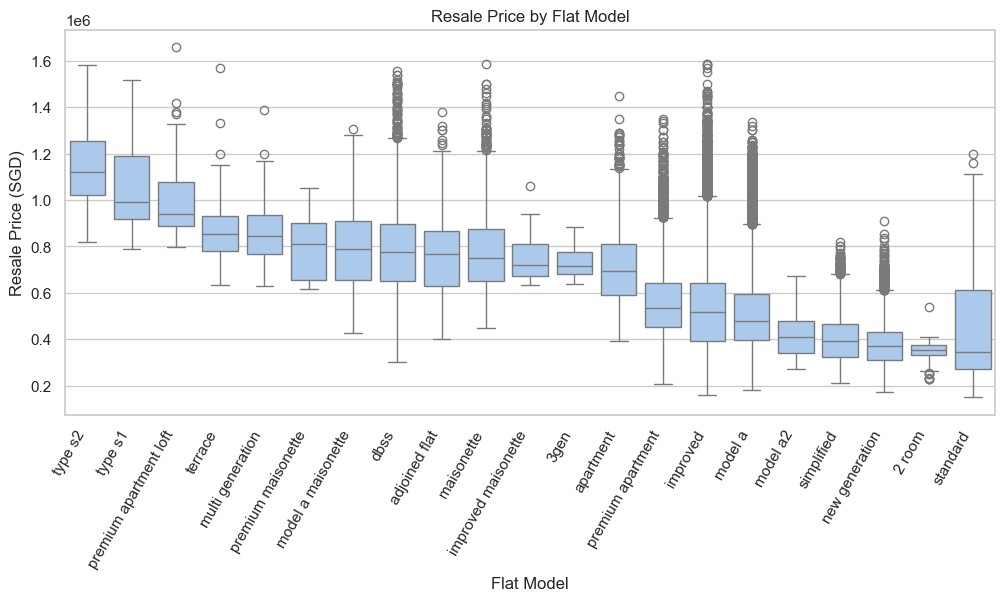

In [15]:
plt.figure(figsize=(12,5))
order = df.groupby('FLAT_MODEL')['RESALE_PRICE'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='FLAT_MODEL', y='RESALE_PRICE', order=order)
plt.title('Resale Price by Flat Model')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Flat Model')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_model_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()


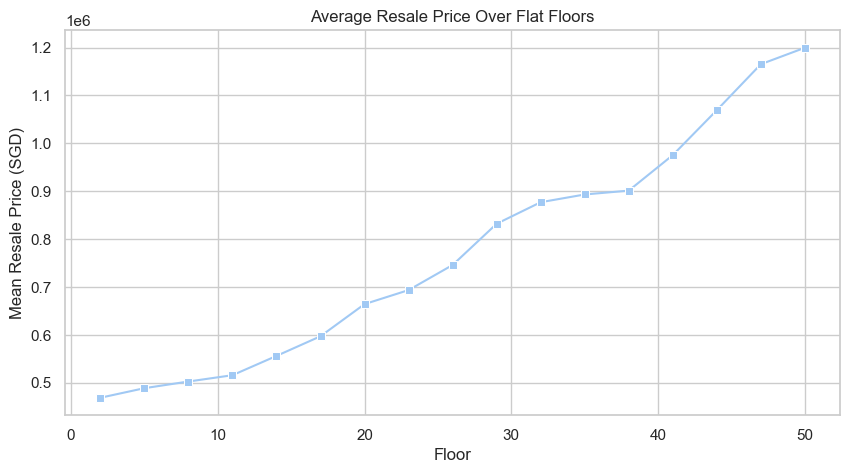

In [16]:
price_trend_mean = df.groupby('FLOOR_AVG')['RESALE_PRICE'].mean().reset_index()
# price_trend_median = df.groupby('FLOOR_AVG')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(data=price_trend_mean, x='FLOOR_AVG', y='RESALE_PRICE', marker='s')

# Median line
# sns.lineplot(
#     data=price_trend_median,
#     x='FLOOR_AVG', y='RESALE_PRICE',
#     label='Median Price', marker='s'
# )
plt.title('Average Resale Price Over Flat Floors')
plt.xlabel('Floor')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_floors_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


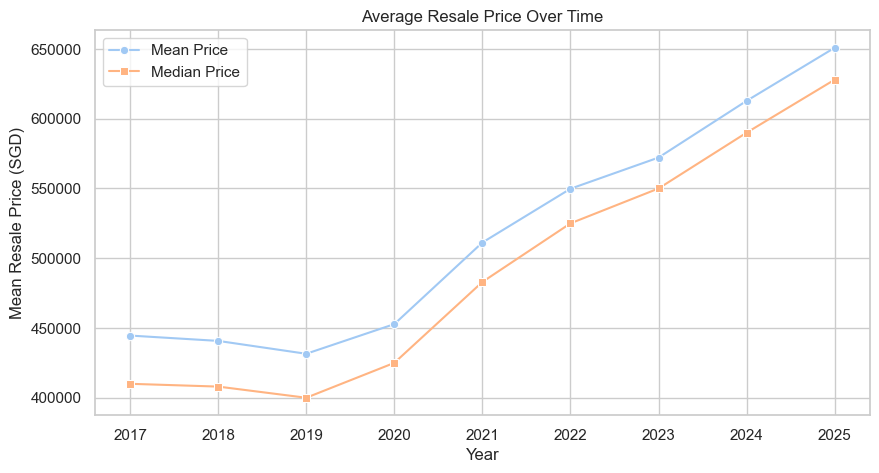

In [17]:
price_trend_mean = df.groupby('RESALE_YEAR')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('RESALE_YEAR')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='RESALE_YEAR', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
sns.lineplot(
    data=price_trend_median,
    x='RESALE_YEAR', y='RESALE_PRICE',
    label='Median Price', marker='s'
)
plt.title('Average Resale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_resale_year_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


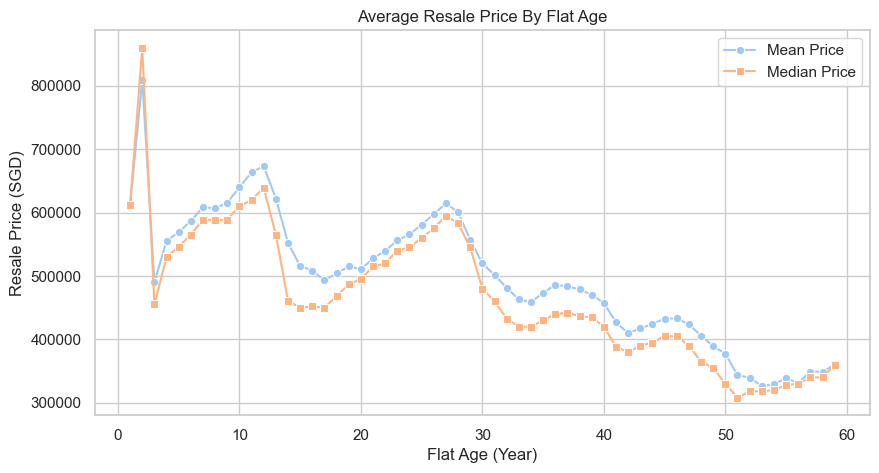

In [18]:
price_trend_mean = df.groupby('FLAT_AGE')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('FLAT_AGE')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='FLAT_AGE', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
sns.lineplot(
    data=price_trend_median,
    x='FLAT_AGE', y='RESALE_PRICE',
    label='Median Price', marker='s'
)
plt.title('Average Resale Price By Flat Age')
plt.xlabel('Flat Age (Year)')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_age_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()

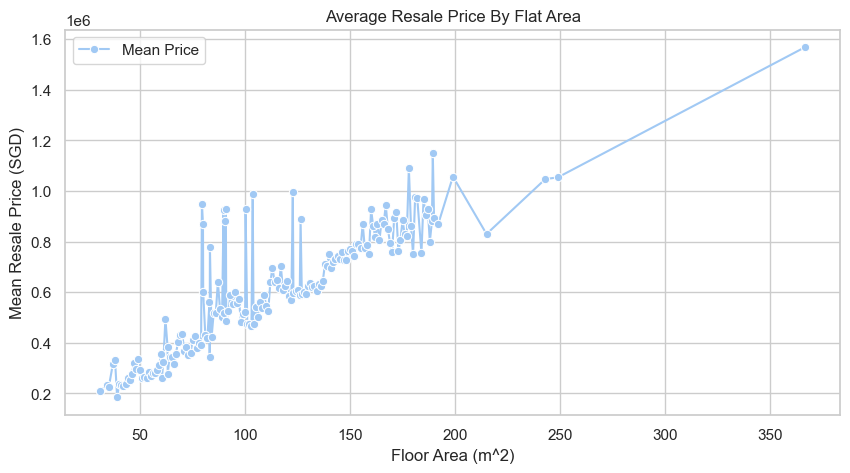

In [19]:
price_trend_mean = df.groupby('FLOOR_AREA_SQM')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('FLOOR_AREA_SQM')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='FLOOR_AREA_SQM', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
# sns.lineplot(
#     data=price_trend_median,
#     x='FLOOR_AREA_SQM', y='RESALE_PRICE',
#     label='Median Price', marker='s'
# )
plt.title('Average Resale Price By Flat Area')
plt.xlabel('Floor Area (m^2)')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_area_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


# Between Features

In [20]:
sns.set_theme(style="whitegrid", palette="muted")

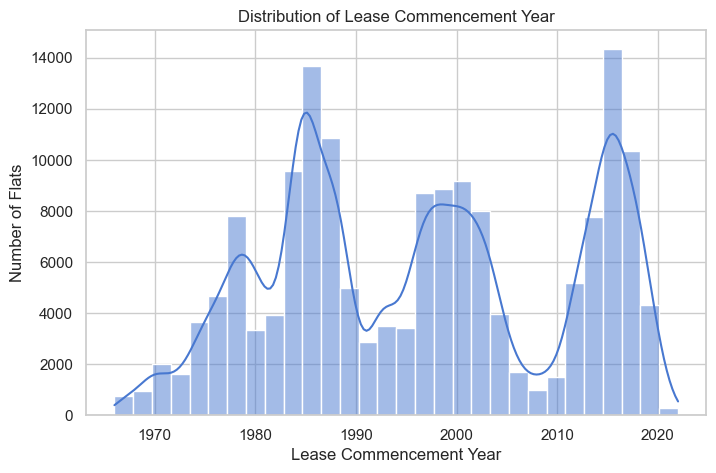

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['LEASE_COMMENCE_DATA'], bins=30, kde=True)
plt.title('Distribution of Lease Commencement Year')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Number of Flats')
plt.savefig('plots/flat_count_distribution_over_lease_commencement_year.png', bbox_inches='tight', dpi=300)
plt.show()

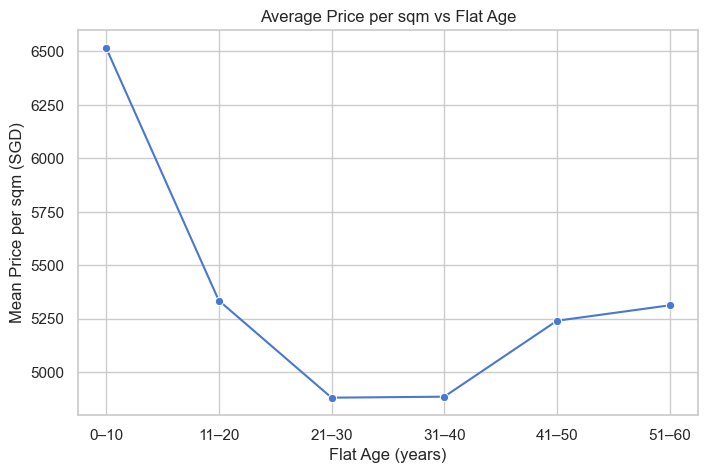

In [22]:
df['PRICE_PER_SQM'] = df['RESALE_PRICE'] / df['FLOOR_AREA_SQM']
df['AGE_BIN'] = pd.cut(df['FLAT_AGE'], bins=[0,10,20,30,40,50,60,70], labels=['0–10','11–20','21–30','31–40','41–50','51–60','61–70'])

price_age = df.groupby('AGE_BIN')['PRICE_PER_SQM'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=price_age, x='AGE_BIN', y='PRICE_PER_SQM', marker='o')
plt.title('Average Price per sqm vs Flat Age')
plt.xlabel('Flat Age (years)')
plt.ylabel('Mean Price per sqm (SGD)')
plt.savefig('plots/resale_price_per_sqm_vs_flat_age.png', bbox_inches='tight', dpi=300)
plt.show()

# Correlation

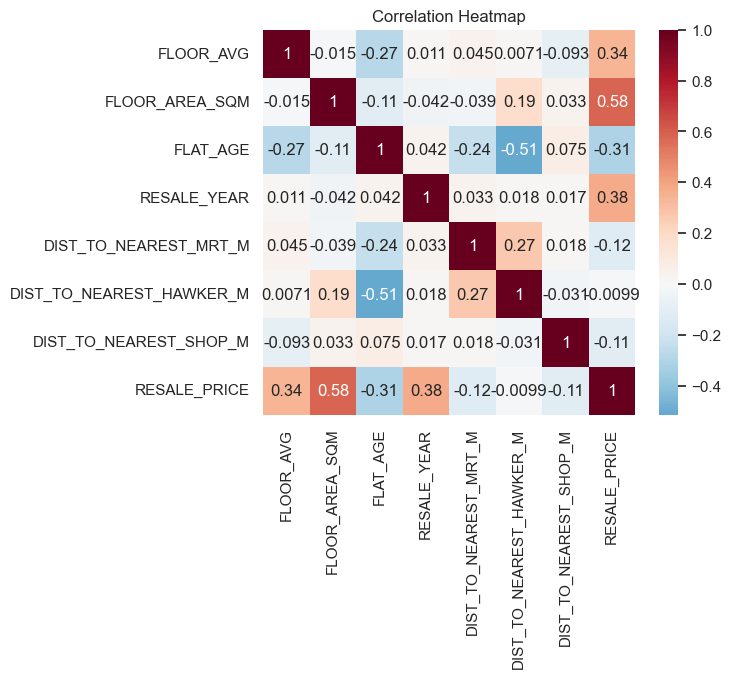

In [23]:
numeric_cols = ['FLOOR_AVG', 'FLOOR_AREA_SQM', 'FLAT_AGE', 'RESALE_YEAR', 'DIST_TO_NEAREST_MRT_M', 'DIST_TO_NEAREST_HAWKER_M', 'DIST_TO_NEAREST_SHOP_M', 'RESALE_PRICE']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.savefig('plots/correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

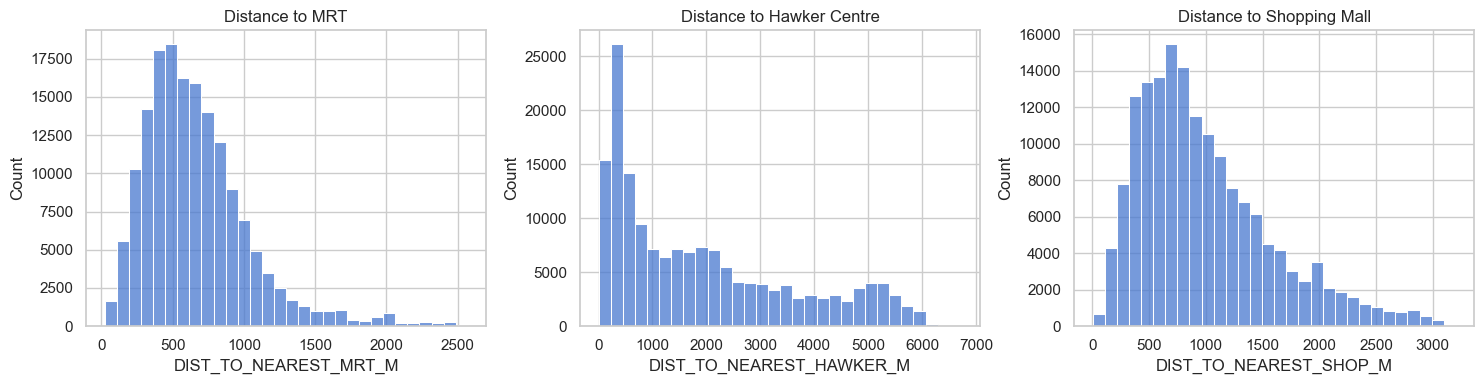

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(df['DIST_TO_NEAREST_MRT_M'], bins=30, ax=axes[0])
sns.histplot(df['DIST_TO_NEAREST_HAWKER_M'], bins=30, ax=axes[1])
sns.histplot(df['DIST_TO_NEAREST_SHOP_M'], bins=30, ax=axes[2])
axes[0].set_title('Distance to MRT')
axes[1].set_title('Distance to Hawker Centre')
axes[2].set_title('Distance to Shopping Mall')
plt.tight_layout()

<Axes: xlabel='DIST_TO_NEAREST_MRT_M', ylabel='RESALE_PRICE'>

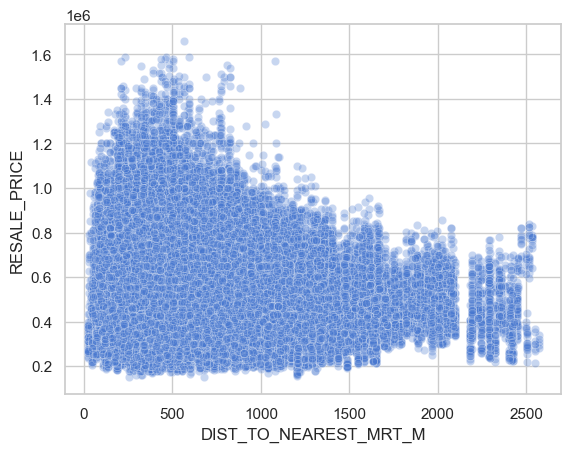

In [25]:
sns.scatterplot(x='DIST_TO_NEAREST_MRT_M', y='RESALE_PRICE', data=df, alpha=0.3)

<Axes: xlabel='DIST_TO_NEAREST_MRT_M', ylabel='RESALE_PRICE'>

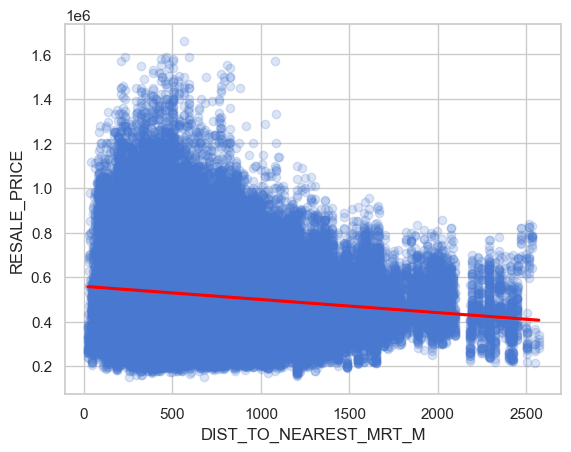

In [26]:
sns.regplot(x='DIST_TO_NEAREST_MRT_M', y='RESALE_PRICE', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
